# Mathematical Underpinnings - Lab 4

In [1]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mutual_info_score
import seaborn as sns
import pandas as pd

## Task 1

### a)

#### bp 1)

In [2]:
# a heatmap
# you may use pcolormesh function and draw a heatmap for a sample
# or draw a heatmap for a teoretic density function

# I give you an answer to that task, because it may take too much time to do it during labs. 

In [3]:
def plot_xyz(data_2d, nbins=300):
    x = data_2d[:,0]
    y = data_2d[:,1]
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    return xi, yi, zi

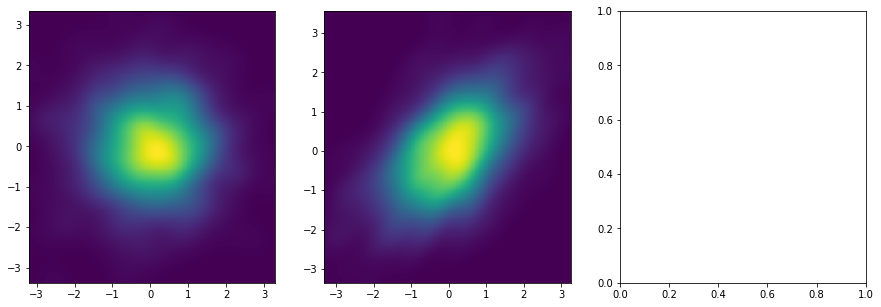

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

n = 1000

data_2d_0 = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
xi_0, yi_0, zi_0 = plot_xyz(data_2d_0)
data_2d_05 = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
xi_1, yi_1, zi_1 = plot_xyz(data_2d_05)
data_2d_1 = np.random.multivariate_normal(np.zeros(2), np.array([[1, 1], [1, 1]]), n)
# xi_2, yi_2, zi_2 = plot_xyz(data_2d_1)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
# axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2)

In [5]:
# pearsonr - Pearson correlation
# use sklearn.metrics.mutual_info_score although it is not the best option 
#       (as it takes max over permutations of classes of r.v. instead of computing one value and returning it)

In [6]:
for data in [data_2d_0, data_2d_05, data_2d_1]:
    print(pearsonr(data[:, 0], data[:, 1]))
    x1 = pd.cut(data[:, 0], bins=10, labels=False)
    x2 = pd.cut(data[:, 1], bins=10, labels=False)
    print(mutual_info_score(x1, x2))
    

PearsonRResult(statistic=-0.0031245729014049454, pvalue=0.9213889101498276)
0.03333911372468064
PearsonRResult(statistic=0.48162680208273084, pvalue=3.3375657677858978e-59)
0.14673371459665344
PearsonRResult(statistic=0.9999999999999999, pvalue=0.0)
1.9457156684489132


#### bp 3)

In [7]:
res = {'p': [], 'method': [], 'score': []}
n = 1000
N = 100

for p in np.linspace(0, 1, 21):
    for i in range(N):
        data = np.random.multivariate_normal(np.zeros(2), np.array([[1, p], [p, 1]]), n)
        res['p'].append(p)
        res['method'].append('pearson')
        res['score'].append(pearsonr(data[:, 0], data[:, 1])[0])

        x1 = pd.cut(data[:, 0], bins=10, labels=False)
        x2 = pd.cut(data[:, 1], bins=10, labels=False)
        res['p'].append(p)
        res['method'].append('mutual info')
        res['score'].append(mutual_info_score(x1, x2))
    

In [8]:
df = pd.DataFrame(res)

In [9]:
df_pearson = df[df.method == 'pearson']
df_mi = df[df.method == 'mutual info']

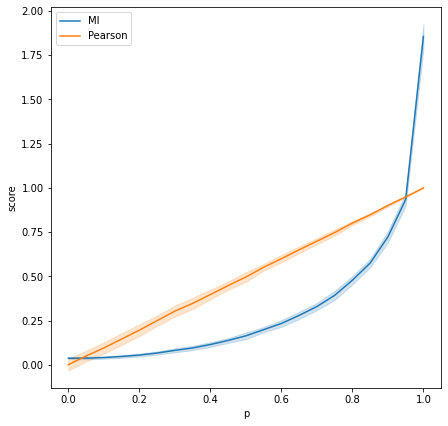

In [10]:
plt.figure(figsize=(7, 7))
sns.lineplot(data=df_mi, x='p', y='score', errorbar='sd', label='MI')
sns.lineplot(data=df_pearson, x='p', y='score', errorbar='sd', label='Pearson')
plt.legend()
plt.show()

#### bp 4)

A hint: note that mutual information between two correlated normal distributions i.e. when $(X, Y)\sim \mathcal{N}((0,0)', \Sigma)$ and
$$\Sigma = \begin{pmatrix}
        \sigma_x^2 & \rho \\ \rho & \sigma_y^2
    \end{pmatrix}$$
equals
$$I(X,Y) = \frac{1}{2}\log \left(\frac{\sigma_x^2\sigma_y^2}{\sigma_x^2\sigma_y^2 - \rho^2}\right).$$

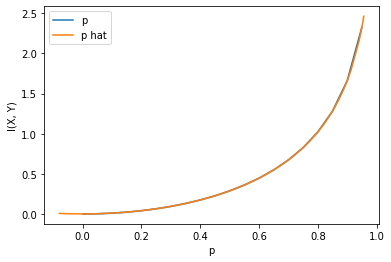

In [11]:
df_pearson_non1 = df_pearson[(df_pearson.score < 0.99) | (df_pearson.p < 0.99)]
sns.lineplot(x=df_pearson_non1.p, y=-np.log(1 - df_pearson_non1.p**2), errorbar='sd', label='p')
sns.lineplot(x=df_pearson_non1.score, y=-np.log(1 - df_pearson_non1.score**2), errorbar='sd', label='p hat')
plt.ylabel('I(X, Y)')
plt.legend()
plt.show()

They overlap so they are very similiar

### b)

#### bp 1)

In [12]:
# again: this is too time consuming so here is an answer

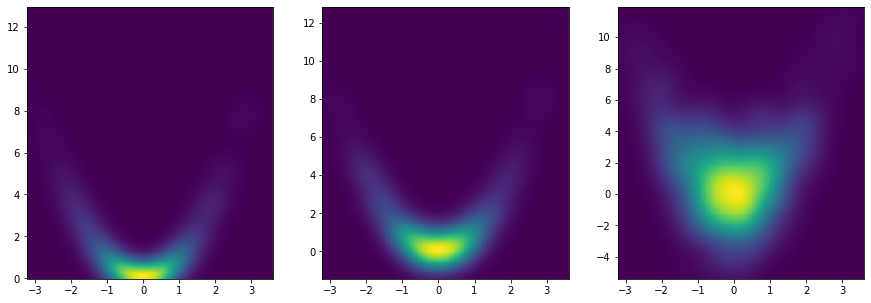

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

n = 1000
x = np.random.normal(0, 1, n)

data_2d = np.array([x, x**2 + np.random.normal(0, 0, n)]).T
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 0.5, n)]).T
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 2, n)]).T
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2) and 3)

In [14]:
res = {'sigma': [], 'method': [], 'score': []}
n = 1000
N = 100

for sigma in np.linspace(0, 2, 21):
    for i in range(N):
        x = np.random.normal(0, 1, n)
        y = x**2 + np.random.normal(0, sigma, n)
        res['sigma'].append(sigma)
        res['method'].append('pearson')
        res['score'].append(pearsonr(x, y)[0])

        x1 = pd.cut(x, bins=10, labels=False)
        x2 = pd.cut(y, bins=10, labels=False)
        res['sigma'].append(sigma)
        res['method'].append('mutual info')
        res['score'].append(mutual_info_score(x1, x2))
    

In [15]:
df = pd.DataFrame(res)
df_pearson = df[df.method == 'pearson']
df_mi = df[df.method == 'mutual info']

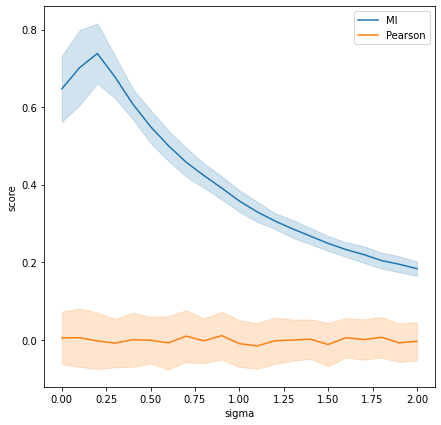

In [16]:
plt.figure(figsize=(7, 7))
sns.lineplot(data=df_mi, x='sigma', y='score', errorbar='sd', label='MI')
sns.lineplot(data=df_pearson, x='sigma', y='score', errorbar='sd', label='Pearson')
plt.legend()
plt.show()

## Task 2

### a)

In [17]:
def indep_test_asymptotic(X, Y, stat):
    X = pd.cut(X, bins=10, labels=False)
    Y = pd.cut(Y, bins=10, labels=False)
    
    if stat == "mi":
        stat_value = 2*len(X)*mutual_info_score(X, Y)
    if stat == "chi2":
        test_res = (chi2_contingency(pd.crosstab(X, Y)))
        stat_value = test_res.statistic

    df = (len(np.unique(X)) - 1)*(len(np.unique(Y)) - 1)

    p_value = 1 - chi2.cdf(stat_value, df=df)

    return stat_value, p_value

### b)

In [18]:
def permutation_test(X, Y, B):
    x1 = pd.cut(X, bins=10, labels=False)
    x2 = pd.cut(Y, bins=10, labels=False)
    MI = mutual_info_score(x1, x2)
    
    MI_b = []
    for i in range(B):
        X_b = X[np.random.permutation(len(X))]
        x1 = pd.cut(X_b, bins=10, labels=False)
        MI_b.append(mutual_info_score(x1, x2))
    
    return (1 + (MI <= np.array(MI_b)).sum()) / (1 + B)

### c)

**Independent r.v.**

A hint: two discretized independent normal random variables (or any two independent discrete r.v.)

In [19]:
n = 1000

X, Y = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n).T

In [20]:
print('MI test:', indep_test_asymptotic(X, Y, 'mi'))
print('Chi2 test:', indep_test_asymptotic(X, Y, 'chi2'))
print('Permutation test:', permutation_test(X, Y, 100))

MI test: (79.71346401479964, 0.5195967158826326)
Chi2 test: (73.71263669658336, 0.7046663199336491)
Permutation test: 0.39603960396039606


**Dependent r.v.**

A hint: two discretized dependent normal random variables (or two categorical wuch that we enforce $X=Y$ for a subset of observations)

In [21]:
n = 1000
X, Y = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.2], [0.2, 1]]), n).T

In [22]:
print('MI test:', indep_test_asymptotic(X, Y, 'mi'))
print('Chi2 test:', indep_test_asymptotic(X, Y, 'chi2'))
print('Permutation test:', permutation_test(X, Y, 100))

MI test: (104.3790171611482, 0.04126351090619007)
Chi2 test: (107.5052938536181, 0.026077092948274982)
Permutation test: 0.04950495049504951
